In [24]:
import numpy as np
import pandas as pd
import matplotlib as mtp
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
#y = train_data["Survived"]

#features = ["Pclass", "Sex", "SibSp", "Parch"]
#X = pd.get_dummies(train_data[features])
#X_test = pd.get_dummies(test_data[features])

#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model.fit(X, y)
#predictions = model.predict(X_test)

#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

In [6]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing Values:

Chaking for and handling missing values

In [8]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are lots of missing values in `Cabin` and `Age` Columns.

### Age Column Missing Values

In [9]:
train_data[train_data['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


### Dellting Age missing values

In [10]:
train_data = train_data[~train_data['Age'].isnull()]
train_data['Age'].isnull().sum()
train_data['Age'].isnull().sum()

np.int64(0)

### Deleting Missing Values:

For Embarked column:

In [11]:
train_data = train_data[~train_data['Embarked'].isna()]

### Drop Columns:

Drop Cabin, Name columns:

In [12]:
train_data = train_data.drop(['Cabin', 'Name', 'Ticket'], axis=1)
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

### Checking the number of survived in the dataset

In [13]:
train_data['Survived'].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


## Prepare The Data

In [15]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [16]:
train_data.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S


In [17]:
#change the index column
train_data.set_index('PassengerId', inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


### Create Dummie Variables

In [18]:
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [19]:
train_data.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Pclass_2         bool
Pclass_3         bool
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object

Heatmap to visualize how correlated variables are

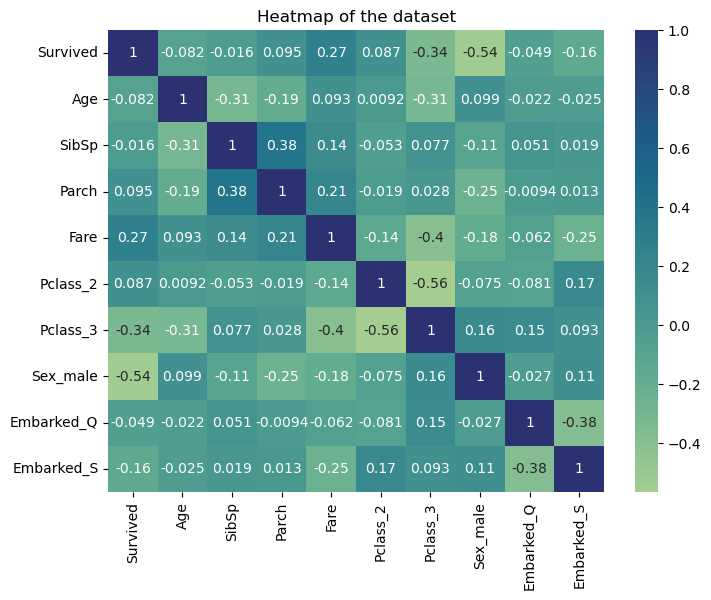

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(train_data.corr(), annot=True, cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

### Create the training and testing data

In [20]:
X = train_data[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

## Model Building

### Fit a Logsitic Regression model to the data

In [27]:
log_clf = LogisticRegression(random_state=42, max_iter=10000).fit(X_train, y_train)

Testing the logistic regression model: we will use the model to make predictions on the test set

In [28]:
y_pred = log_clf.predict(X_test)

Confusion matrix to visualize the results of the logistic regression model.